In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

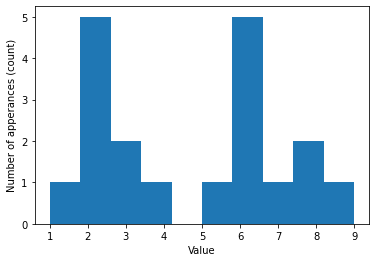

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([1, 5, 2, 1, 1, 5, 1, 2, 1]))


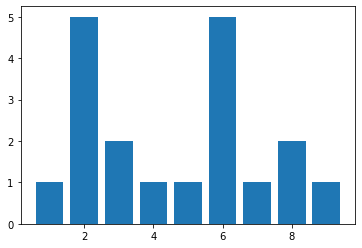

In [2]:
data = [1, 2, 2, 2, 2, 2, 3, 4, 5, 6, 6, 6, 6, 7, 8, 9, 8, 6, 3]

plt.hist(data)
plt.xlabel("Value")
plt.ylabel("Number of apperances (count)")
plt.show()

y, x = np.histogram(data, bins=np.arange(1, 10+1))
print((x, y))

plt.bar(x[:-1], y)
plt.show()

(array([1, 5, 2, 1, 1, 5, 1, 2, 1]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))


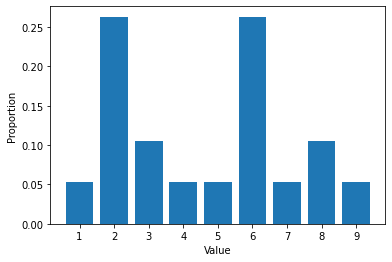

In [3]:
hist, bins = np.histogram(data, bins=np.arange(1, 10+1))
histP = hist/np.sum(hist)
print((hist, bins))

plt.bar(bins[:-1], histP)
plt.xlabel("Value")
plt.ylabel("Proportion")
plt.xticks(np.arange(1, 10))
plt.show()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([1, 5, 2, 1, 1, 5, 1, 2, 1]))


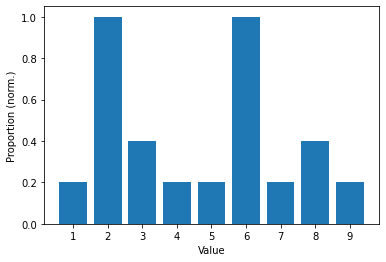

In [4]:
y, x = np.histogram(data, bins=np.arange(1, 10+1))
yP = y/np.max(y)
print((x, y))

plt.bar(x[:-1], yP)
plt.xlabel("Value")
plt.ylabel("Proportion (norm.)")
plt.xticks(np.arange(1, 10))
plt.show()

# Exercise

Make a graph and probability density for these functions:

$
y = x \\
y = x^2 \\
y = x^3
$

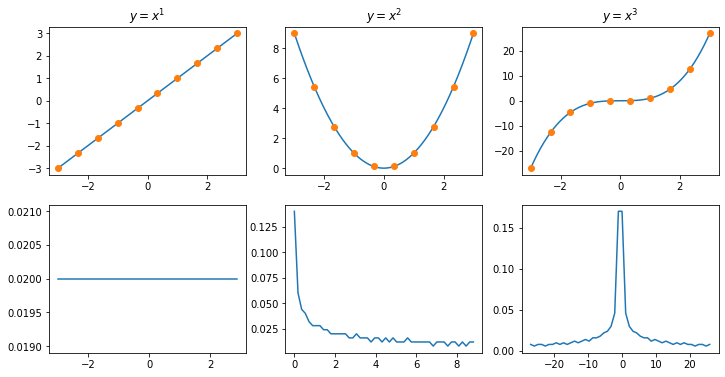

In [5]:
x = np.linspace(-3, 3, 500)
x_points = np.linspace(-3, 3, 10)

fig, ax = plt.subplots(2, 3, figsize=(12, 6))

for i in range(3):
  y = x**(i+1)
  y_points = x_points**(i+1)
  h = np.histogram(y, 50)
  yP = h[0]/np.sum(h[0])

  ax[0, i].plot(x, y)
  ax[0, i].plot(x_points, y_points, 'o')
  ax[0, i].set_title(f"$y = x^{i+1}$")

  ax[1, i].plot(h[1][:-1], yP)

plt.show()

In [6]:
x = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27])
hist, bins = np.histogram(x, bins=[0, 20, 40, 60, 80, 100])
print(hist)
print(bins)

[3 4 5 2 1]
[  0  20  40  60  80 100]


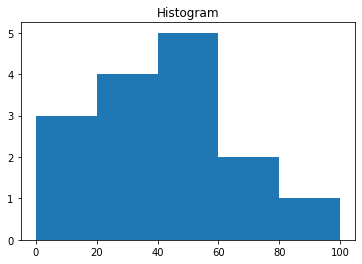

In [7]:
a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27])
plt.hist(a, bins=[0, 20, 40, 60, 80, 100])
plt.title("Histogram")
plt.show()

In [8]:
xedges = [0, 1, 3, 5]
yedges = [0, 2, 3, 4, 6]

x = np.random.normal(2, 1, 100)
y = np.random.normal(1, 1, 100)
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
print(H)
print(xedges)
print(yedges)

[[ 8.  0.  0.  0.]
 [49. 13.  1.  0.]
 [ 9.  1.  0.  0.]]
[0 1 3 5]
[0 2 3 4 6]


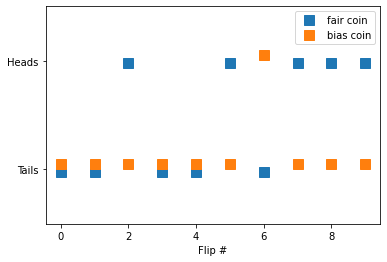

In [9]:
faircoin = .5
biascoin = .6

n_trials = 10

results = np.zeros((2, n_trials))

for i in range(0, n_trials):
  results[0, i] = np.random.rand() > faircoin
  results[1, i] = np.random.rand() > biascoin

plt.plot(results[0, :]-.02, 's', markersize=10, label='fair coin')
plt.plot(results[1, :]+.05, 's', markersize=10, label='bias coin')
plt.legend()
plt.xlabel("Flip #")
plt.yticks([0, 1], ['Tails', 'Heads'])
plt.ylim([-0.5, 1.5])
plt.show()

In [10]:
df = pd.DataFrame(results, index=['fair', 'biased'], dtype='int')
df['avg.'] = df.mean(axis=1)
df

,0,1,2,3,4,5,6,7,8,9,avg.
fair,0,0,1,0,0,1,0,1,1,1,0.5
biased,0,0,0,0,0,0,1,0,0,0,0.1


# Exercise

Create a "weighted die" that is twice as likely to roll "1" as any other number.

Make a probability graph based on 50 rolls.

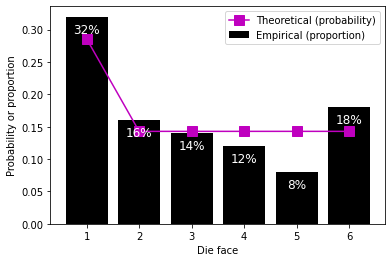

In [11]:
n = 50

outcomes = np.zeros(6)
pure_probs = np.array([2, 1, 1, 1, 1, 1])
pure_probs = pure_probs / np.sum(pure_probs)

for i in range(n):
  die_roll = np.random.randint(0, 6+1)
  if die_roll == 6:
    die_roll = 0

  outcomes[die_roll] += 1

plt.bar(range(1, 7), outcomes/n, color='k', label='Empirical (proportion)')
plt.plot(range(1, 7), pure_probs, 'ms-', markersize=10, label='Theoretical (probability)')
plt.xlabel('Die face')
plt.ylabel('Probability or proportion')
plt.legend()

for i in range(1, 7):
  plt.text(i, outcomes[i-1]/n-.025, f'{int(100*outcomes[i-1]/n)}%', 
           color='w', fontsize=12, 
           horizontalalignment='center')

plt.show()

# Gaussian distribution

Mean is 5.05889, std is 1.98768


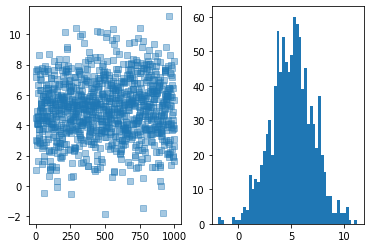

In [12]:
shift = 5
stretch = 2
n = 1000

pnts = np.random.randn(n) * stretch + shift
print('Mean is %g, std is %g' % (np.mean(pnts), np.std(pnts)))

fig, ax = plt.subplots(1, 2, figsize=(6, 4))
ax[0].plot(pnts, 's', alpha=.4)
ax[1].hist(pnts, 50)

plt.show()

# Uniform distribution

Mean is 5.00947, range is 1.99774


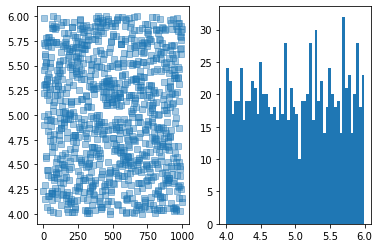

In [13]:
shift = 5
stretch = 2
n = 1000

pnts = np.random.rand(n) * stretch + shift - .5*stretch
print('Mean is %g, range is %g' % (np.mean(pnts), np.max(pnts)-np.min(pnts)))

fig, ax = plt.subplots(1, 2, figsize=(6, 4))
ax[0].plot(pnts, 's', alpha=.4)
ax[1].hist(pnts, 50)

plt.show()

Mean is 4.9678, range is 1.98282


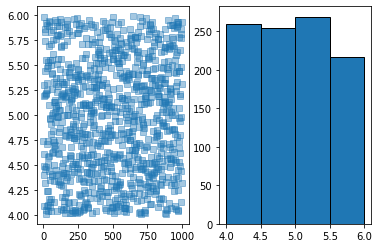

In [14]:
shift = 5
stretch = 2
n = 1000

pnts = np.random.rand(n) * stretch + shift - .5*stretch
print('Mean is %g, range is %g' % (np.mean(pnts), np.max(pnts)-np.min(pnts)))

fig, ax = plt.subplots(1, 2, figsize=(6, 4))
ax[0].plot(pnts, 's', alpha=.4)
ax[1].hist(pnts, bins=[4, 4.5, 5, 5.5, 6], edgecolor='k')

plt.show()

Mean is 3.297, variance is 3.26279, std is 1.80632


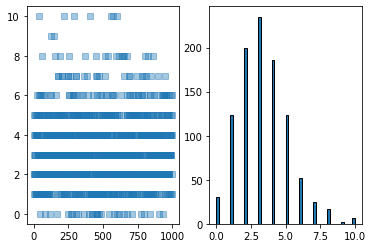

In [15]:
lam = 3.4
n = 1000

pnts = np.random.poisson(lam, n)
print('Mean is %g, variance is %g, std is %g' % (np.mean(pnts), 
                                                 np.var(pnts), np.std(pnts)))

fig, ax = plt.subplots(1, 2, figsize=(6, 4))
ax[0].plot(pnts, 's', alpha=.4)
ax[1].hist(pnts, 50, edgecolor='k')

plt.show()

Mean is 3.32, variance is 3.4976, std is 1.87019


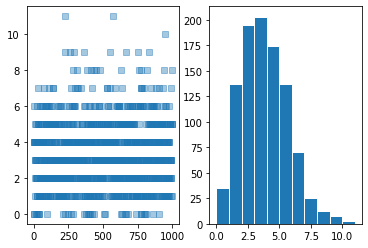

In [16]:
lam = 3.4
n = 1000

pnts = np.random.poisson(lam, n)
print('Mean is %g, variance is %g, std is %g' % (np.mean(pnts), 
                                                 np.var(pnts), np.std(pnts)))

fig, ax = plt.subplots(1, 2, figsize=(6, 4))
ax[0].plot(pnts, 's', alpha=.4)
ax[1].hist(pnts, bins=np.arange(0, np.max(pnts)+1), edgecolor='w')

plt.show()

# Exercise

Normalize any distribution into a Gaussian distribution

1. Rank-transform the data
2. Normalize to [-1, 1]
3. Take inverse hyperbolic

In [17]:
from scipy.stats import rankdata

print(rankdata([1, 1.1, 1.11, 100000000000]))
print(rankdata([1.11, 1, 1.1, 100000000000]))

[1. 2. 3. 4.]
[3. 1. 2. 4.]


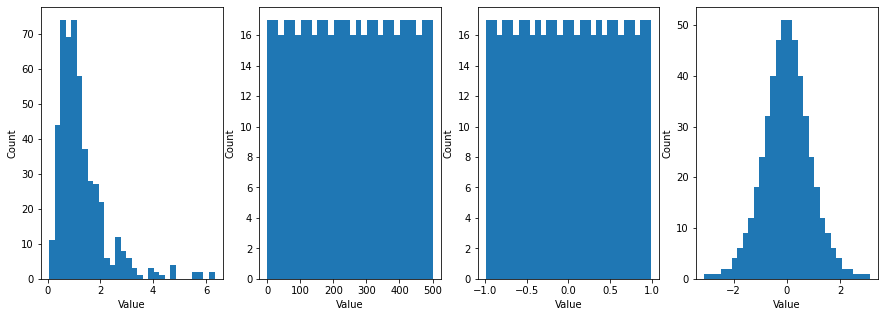

In [18]:
n = 500
origin_data = 2**np.random.randn(n)

# rank data
rank_data = rankdata(origin_data)
rank_data = np.append(rank_data, np.max(rank_data)+1)

# normalize data to [-1, 1]
norm_data = 2*(rank_data/np.max(rank_data))-1
norm_data = np.delete(norm_data, n)

# hyperbolic transform
transform_data = np.arctanh(norm_data)

fig, ax = plt.subplots(1, 4, figsize=(15, 5))

ax[0].hist(origin_data, 30)
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Count')

ax[1].hist(rank_data, 30)
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Count')

ax[2].hist(norm_data, 30)
ax[2].set_xlabel('Value')
ax[2].set_ylabel('Count')

ax[3].hist(transform_data, 30)
ax[3].set_xlabel('Value')
ax[3].set_ylabel('Count')

plt.show()

# The central limit theorem

Random samples from independent variables will tend towards a normal (Gaussian) distribution, even if the variables are non-normally distributed.

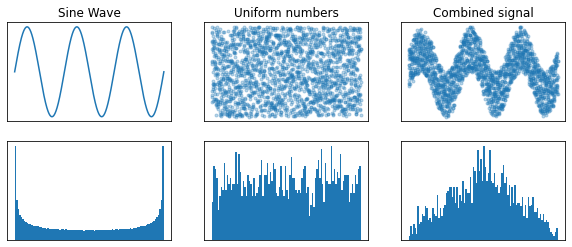

In [25]:
n = 2000

sig1 = np.sin(np.linspace(0, 6*np.pi, n))
sig2 = np.random.rand(n)*2-1
combi = sig1 + sig2

fig, ax = plt.subplots(2, 3, figsize=(10, 4))

ax[0, 0].plot(sig1)
ax[0, 0].set_title("Sine Wave")
ax[1, 0].hist(sig1, 100)

ax[0, 1].plot(sig2, '.', alpha=.3)
ax[0, 1].set_title("Uniform numbers")
ax[1, 1].hist(sig2, 100)

ax[0, 2].plot(combi, '.', alpha=.3)
ax[0, 2].set_title("Combined signal")
ax[1, 2].hist(combi, 100)

axs = np.matrix.flatten(ax)
# or
#axs = np.ravel(ax)
for a in axs:
  a.set_xticks([])
  a.set_yticks([])

plt.show()

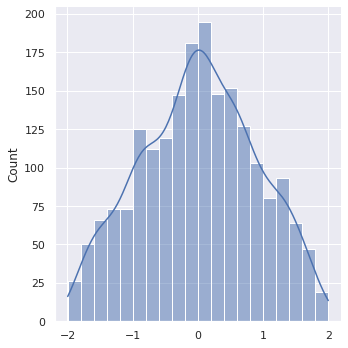

In [31]:
sns.set()
sns.displot(combi, kde=True)
plt.show()

# Exercise

Repeat the Python exercise (sine + uniform noise) for $N \in \{50, ..., 10000\}$

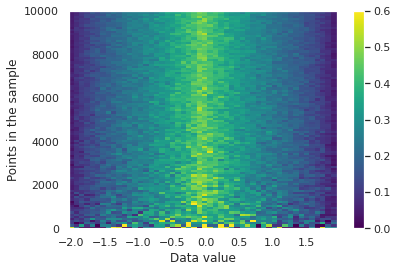

In [36]:
ns = np.arange(50, 10_000, 100)
nbins = 50

all_hist = np.zeros((len(ns), nbins))

for i in range(len(ns)):
  sig1 = np.sin(np.linspace(0, 6*np.pi, ns[i]))
  sig2 = np.random.rand(ns[i])*2-1
  combi = sig1 + sig2
  y, x = np.histogram(combi, nbins, density=True)
  all_hist[i, :] = y

plt.pcolor(x[:-1], ns, all_hist, vmax=.6, cmap='viridis')
plt.xlabel("Data value")
plt.ylabel("Points in the sample")
plt.colorbar()
plt.show()

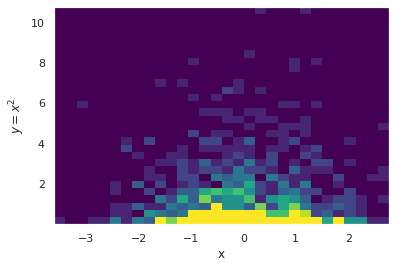

In [39]:
n = 1000
x = np.random.randn(n)
y = np.random.randn(n)**2

plt.hist2d(x, y, 30, vmax=10, cmap='viridis')
plt.xlabel('x')
plt.ylabel('$y = x^2$')
plt.show()

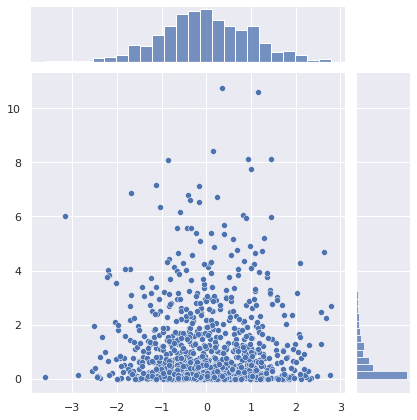

In [47]:
sns.set()
sns.jointplot(x=x, y=y, kind='scatter')
plt.show()

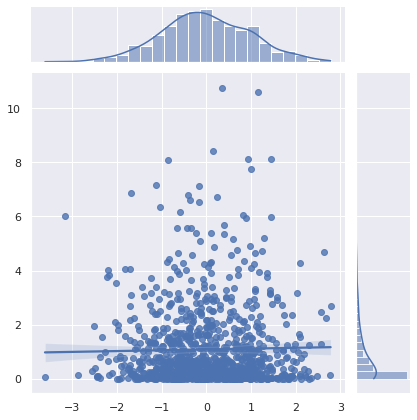

In [45]:
sns.set()
sns.jointplot(x=x, y=y, kind='reg')
plt.show()

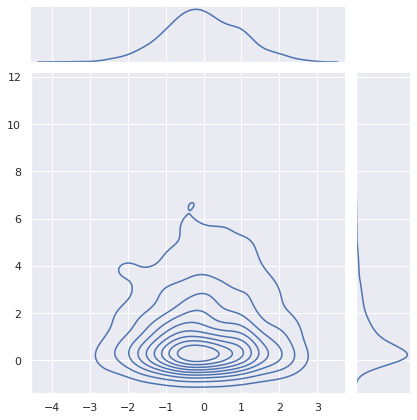

In [46]:
sns.set()
sns.jointplot(x=x, y=y, kind='kde')
plt.show()

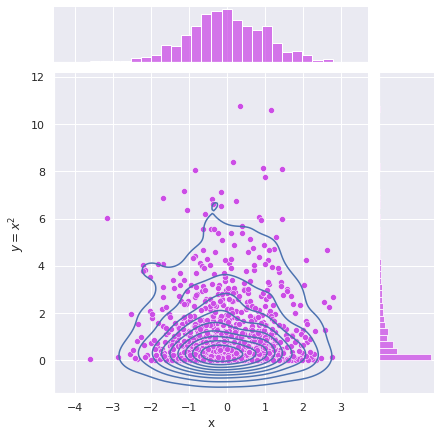

In [51]:
sns.set()
sns.jointplot(x=x, y=y, kind='scatter', color=[.8, .3, .9]).plot_joint(sns.kdeplot)
plt.xlabel('x')
plt.ylabel('$y = x^2$')
plt.show()

In [53]:
data = pd.read_csv('/content/data.csv', header=None, names=['x', 'y'])
data.head()

,x,y
0,0.10230,0.78202
1,0.13482,0.75930
2,0.19309,0.76550
3,0.23103,0.84814
4,0.13889,0.90393


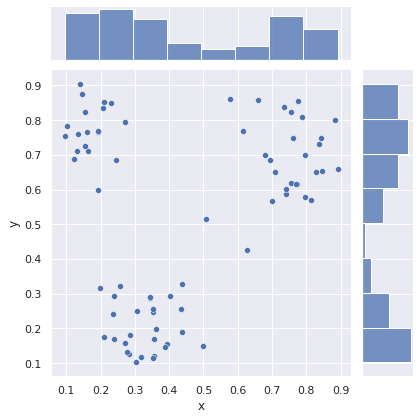

In [55]:
sns.jointplot(x=data['x'], y=data['y'])
plt.show()

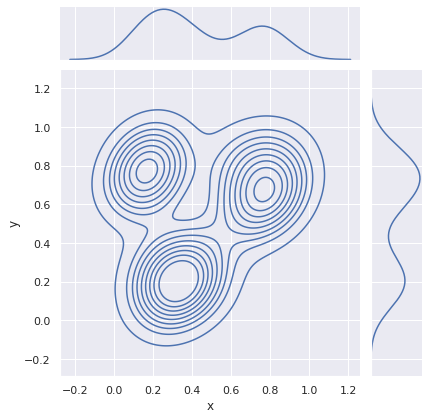

In [58]:
sns.jointplot(x=data['x'], y=data['y'], kind='kde')
plt.show()

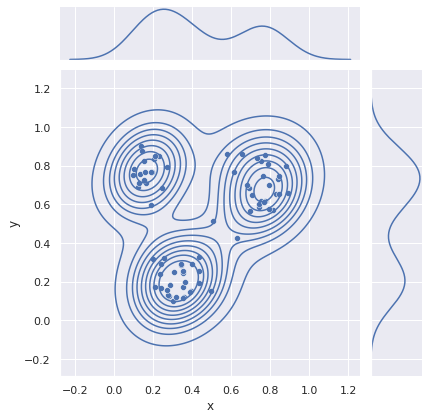

In [60]:
sns.set()
sns.jointplot(x=data['x'], y=data['y'], kind='kde').plot_joint(sns.scatterplot)
plt.show()